c:\structure\code\napari-tools-menu\napari_tools_menu\__init__.py:122: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")


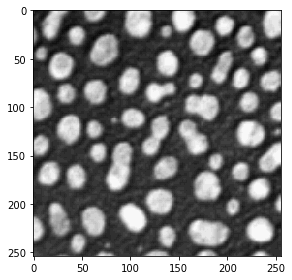

In [1]:
from napari_segment_blobs_and_things_with_membranes import *

from skimage.io import imread, imshow

blobs = imread('https://fiji.sc/samples/blobs.png')
imshow(blobs)

## Voronoi-Otsu-Labeling

C:\Users\rober\miniconda3\envs\bio_38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


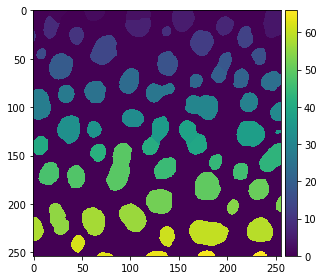

In [2]:
labels = voronoi_otsu_labeling(blobs, spot_sigma=3.5, outline_sigma=1)
imshow(labels)

## Threshold Otsu

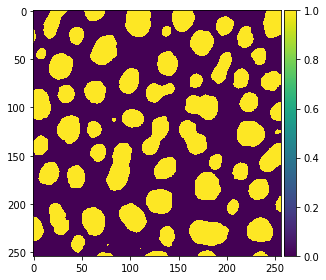

In [3]:
binary = threshold_otsu(blobs)
imshow(binary)

## Binary invert

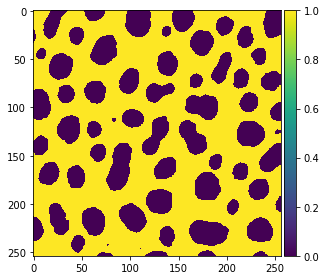

In [4]:
inverted_binary = binary_invert(binary)
imshow(inverted_binary)

## Connected component labeling

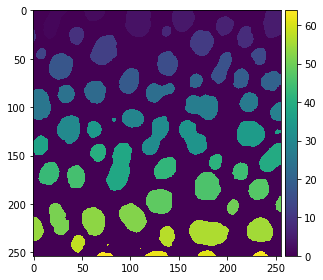

In [5]:
labels = connected_component_labeling(binary)
imshow(labels)

## Split touching objects (formerly known as binary watershed)

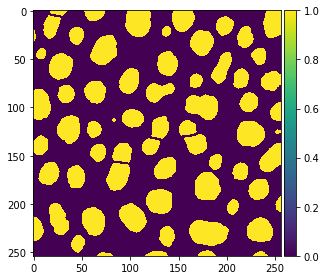

In [6]:
split_objects = split_touching_objects(binary) * 1
imshow(split_objects)

## Seeded waterhed

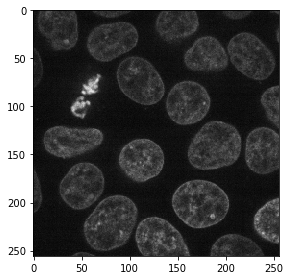

In [7]:
from skimage import data
cells = data.cells3d()

nuclei = cells[30, 1]
imshow(nuclei)

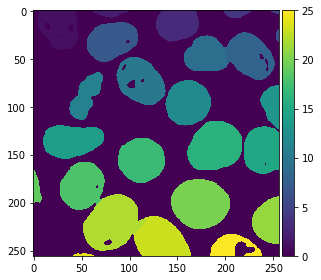

In [8]:
labeled_nuclei = voronoi_otsu_labeling(nuclei, spot_sigma=10)
imshow(labeled_nuclei)

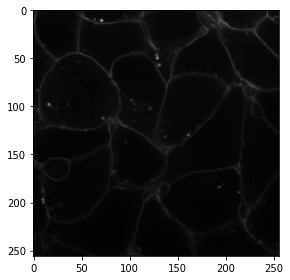

In [9]:
membranes = cells[30, 0]
imshow(membranes)

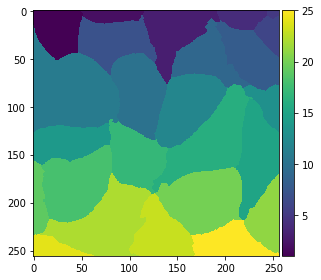

In [10]:
cells = seeded_watershed(membranes, labeled_nuclei)
imshow(cells)

## Subtract background

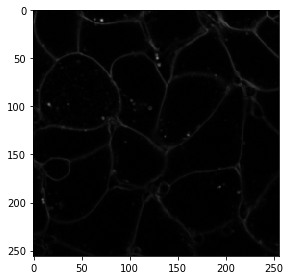

In [11]:
background_subtracted = subtract_background(membranes)
imshow(background_subtracted)

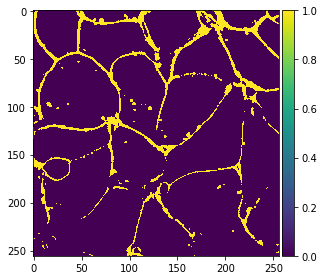

In [12]:
imshow(threshold_otsu(background_subtracted))

## Segment watershed using local minima as seeds

27


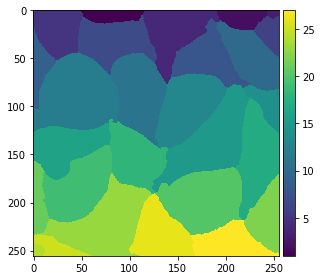

In [13]:
cells = local_minima_seeded_watershed(membranes)
imshow(cells)